# Customer Segmentation for E-commerce
- **Data Preprocessing**: Loads and cleans the transaction dataset by handling missing values, encoding categorical variables, and dropping irrelevant columns for focused analysis.

- **Feature Scaling**: Standardizes features using StandardScaler to ensure equal contribution to clustering algorithms.

- **Clustering Techniques**: Applies K-means clustering with the Elbow method to determine the optimal number of clusters and uses hierarchical clustering with a dendrogram for visual analysis of customer relationships.

- **Cluster Analysis**: Groups customers into segments based on purchasing behavior, calculating mean values for features within each cluster to generate actionable insights for targeted marketing strategies.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [13]:
data = pd.read_csv('shop.csv')
print(data.head())


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [14]:
print(data.isnull().sum())

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['City', 'Membership Type'], drop_first=True)

# Drop any irrelevant columns
data.drop(['Customer ID', 'Satisfaction Level'], axis=1, inplace=True)


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [6]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


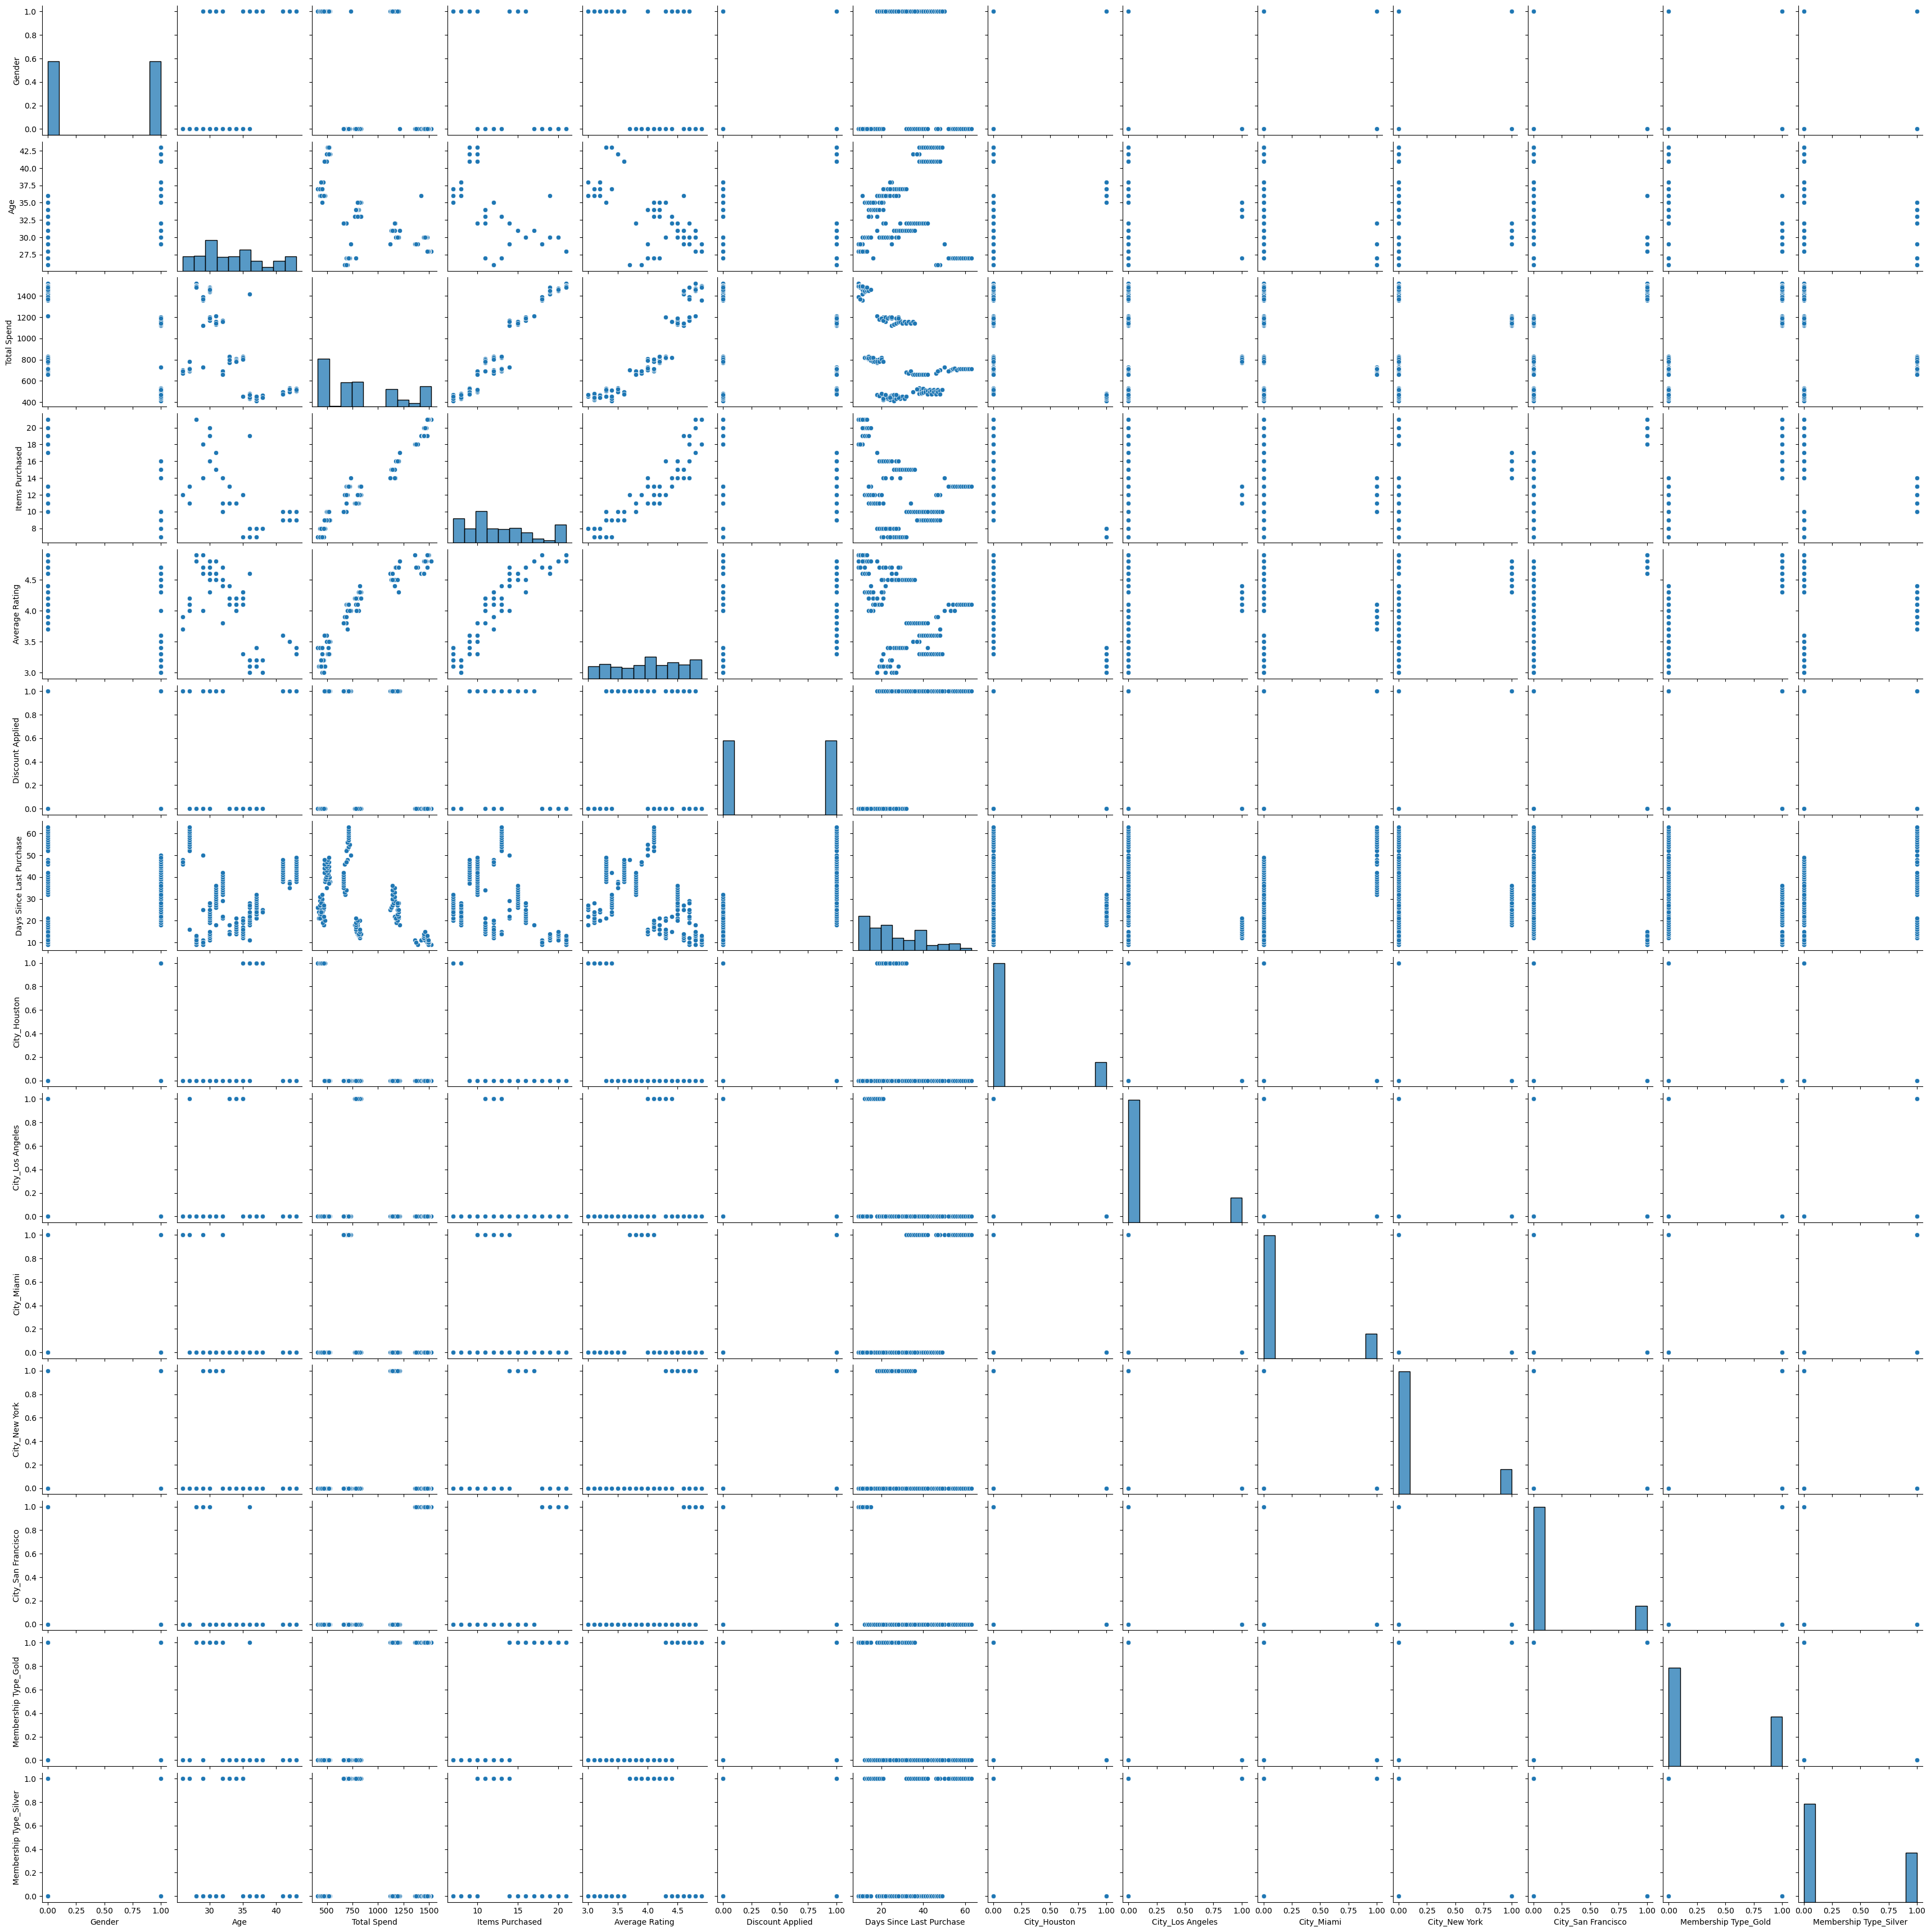

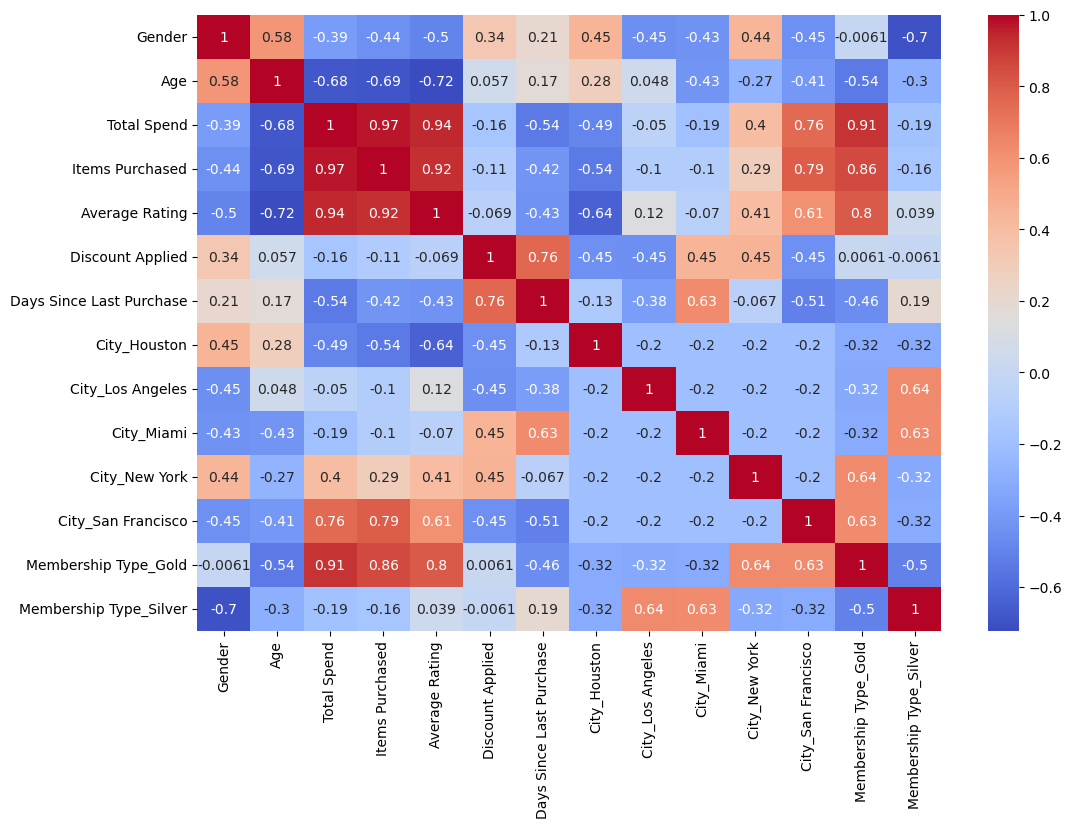

In [7]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
#K-means Clustering

C:\Users\sachc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sachc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sachc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sachc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

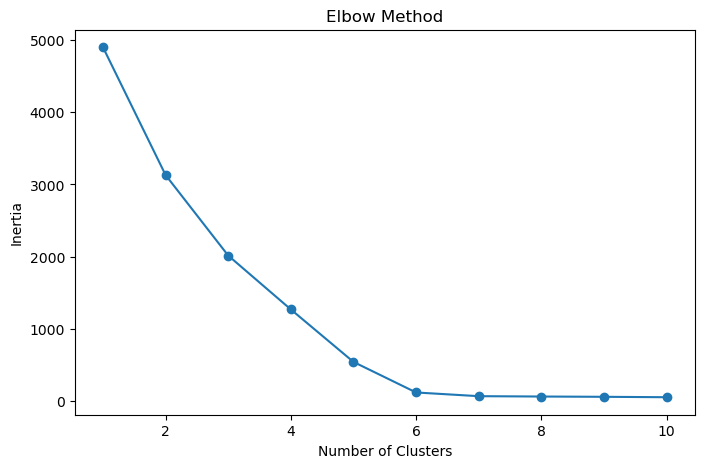

C:\Users\sachc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit the K-means model with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [10]:
#Hiearchical Clustering

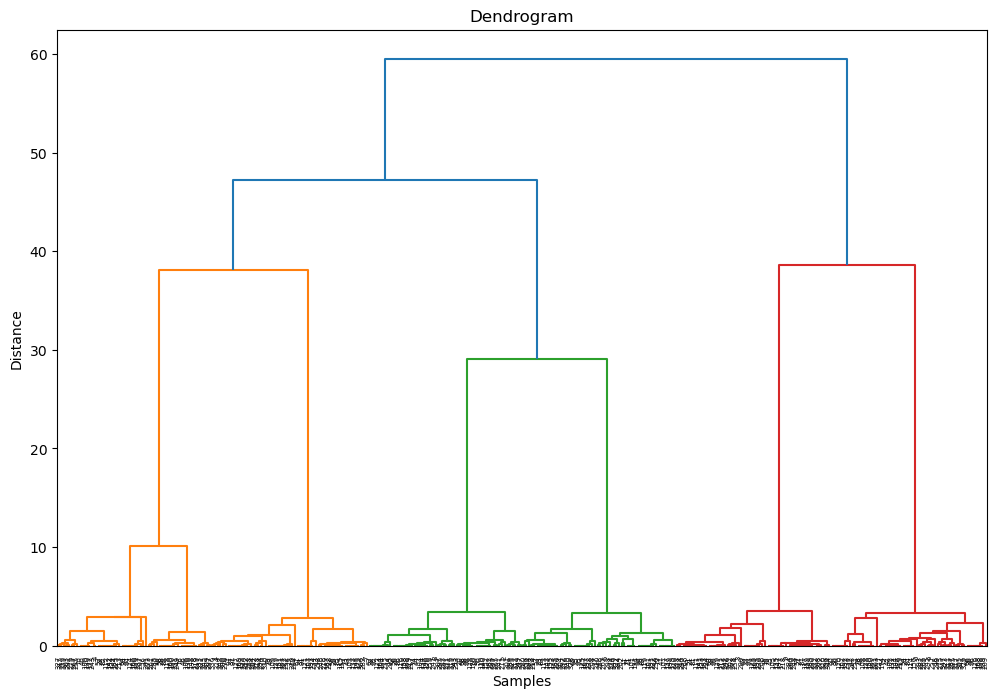

In [11]:
# Create a dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(scaled_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [12]:
# Group by clusters and calculate mean values
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)


           Gender        Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                                      
0        1.000000  39.362069   473.388793         8.491379        3.325000   
1        0.495726  29.923077  1311.144444        17.615385        4.675214   
2        0.008547  31.555556   748.432479        11.658120        4.051282   

         Discount Applied  Days Since Last Purchase  City_Houston  \
Cluster                                                             
0                0.500000                 31.612069           0.5   
1                0.504274                 17.940171           0.0   
2                0.495726                 30.256410           0.0   

         City_Los Angeles  City_Miami  City_New York  City_San Francisco  \
Cluster                                                                    
0                0.000000    0.000000       0.000000            0.000000   
1                0.000000    0.0000